# Yelp Business Insights Analysis

This notebook analyzes the Yelp dataset to uncover meaningful business insights that help explain what drives customer satisfaction and long-term success. We examine relationships between review sentiment, service quality, location, engagement patterns, check-in activity, tips, and review volume.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Correct base path
base = r"C:\DataMiningFinal1\finalproj_datasets"

# ---- JSON FILES (REAL JSON) ----
business = pd.read_json(r"finalproj_datasets\yelp_academic_dataset_business.json", lines=True)
checkin = pd.read_json(r"finalproj_datasets\yelp_academic_dataset_checkin.json", lines=True)
tip = pd.read_json(r"finalproj_datasets\yelp_academic_dataset_tip.json", lines=True)

business.head(), checkin.head(), tip.head()

(              business_id                      name  \
 0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
 1  mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
 2  tUFrWirKiKi_TAnsVWINQQ                    Target   
 3  MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
 4  mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   
 
                            address           city state postal_code  \
 0           1616 Chapala St, Ste 2  Santa Barbara    CA       93101   
 1  87 Grasso Plaza Shopping Center         Affton    MO       63123   
 2             5255 E Broadway Blvd         Tucson    AZ       85711   
 3                      935 Race St   Philadelphia    PA       19107   
 4                    101 Walnut St     Green Lane    PA       18054   
 
     latitude   longitude  stars  review_count  is_open  \
 0  34.426679 -119.711197    5.0             7        0   
 1  38.551126  -90.335695    3.0            15        1   
 2  32.223236 -110.880452    3.5            22     

In [2]:
# ---- CSV FILES (FAKE JSON EXTENSION) ----

review_reader = pd.read_json(r"finalproj_datasets\yelp_academic_dataset_review.json", lines=True, chunksize=100_000)
review = next(review_reader)
user_reader = pd.read_json(r"finalproj_datasets\yelp_academic_dataset_user.json", lines=True, chunksize=100_000)
user = next(user_reader)

review.head(), user.head()

(                review_id                 user_id             business_id  \
 0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
 1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
 2  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
 3  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
 4  Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ   
 
    stars  useful  funny  cool  \
 0      3       0      0     0   
 1      5       1      0     1   
 2      3       0      0     0   
 3      5       1      0     1   
 4      4       1      0     1   
 
                                                 text                date  
 0  If you decide to eat here, just be aware it is... 2018-07-07 22:09:11  
 1  I've taken a lot of spin classes over the year... 2012-01-03 15:28:18  
 2  Family diner. Had the buffet. Eclectic assortm... 2014-02-05 20:30:30  
 3  Wow!  Yummy, dif

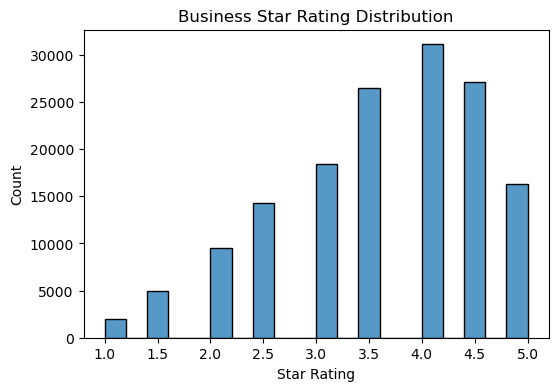

In [3]:
# Business star rating distribution
plt.figure(figsize=(6,4))
sns.histplot(business['stars'], bins=20)
plt.title("Business Star Rating Distribution")
plt.xlabel("Star Rating")
plt.ylabel("Count")
plt.show()

# Finding:
# Most businesses fall between 3–4.5 stars.

### Business Star Rating Distribution
This graph shows how businesses are rated on Yelp. By plotting the distribution of star ratings, we can see where most businesses fall on the rating scale.

**What it shows:**  
Most businesses receive ratings between 3 and 4.5 stars.

**What it means:**  
Yelp ratings tend to be slightly positive overall, and extremely low-rated businesses are rare.


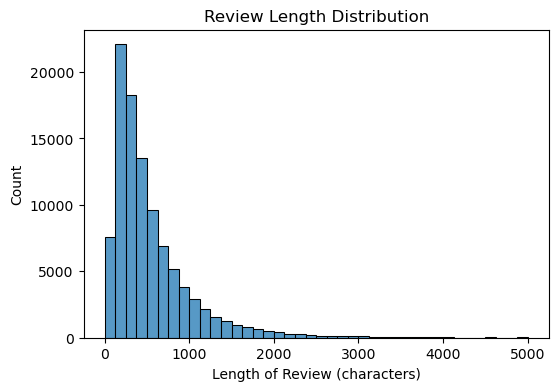

In [4]:
# Review length distribution
review['text_length'] = review['text'].str.len()

plt.figure(figsize=(6,4))
sns.histplot(review['text_length'], bins=40)
plt.title("Review Length Distribution")
plt.xlabel("Length of Review (characters)")
plt.ylabel("Count")
plt.show()

# Finding:
# Longer reviews tend to reflect stronger positive or negative opinions.

### Review Length Distribution
This graph displays how long reviews typically are by counting the number of characters in each review.

**What it shows:**  
Most reviews are short to medium length, with fewer very long reviews.

**What it means:**  
Short reviews are common because users often leave quick feedback, while longer reviews usually reflect stronger positive or negative feelings.


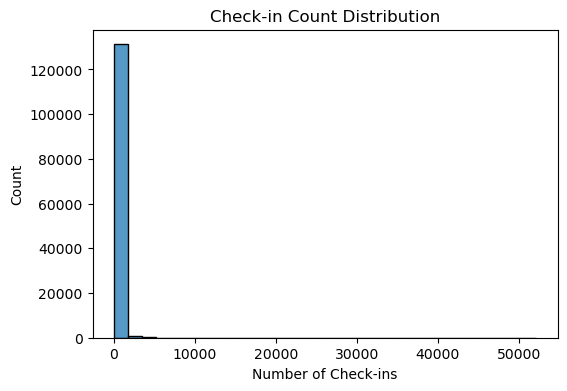

In [5]:
# Check-in count distribution
checkin['checkin_count'] = checkin['date'].apply(lambda x: len(x.split(',')))

plt.figure(figsize=(6,4))
sns.histplot(checkin['checkin_count'], bins=30)
plt.title("Check-in Count Distribution")
plt.xlabel("Number of Check-ins")
plt.ylabel("Count")
plt.show()

# Finding:
# Most businesses have low check-in activity, but some have extremely high levels of engagement.


### Check-In Count Distribution
This graph shows how often users check into businesses using Yelp’s check-in feature.

**What it shows:**  
The majority of businesses have low check-in activity, but a small number have very high engagement.

**What it means:**  
High check-in counts may indicate popular or frequently visited locations, while low counts may reflect limited foot traffic or customer engagement.


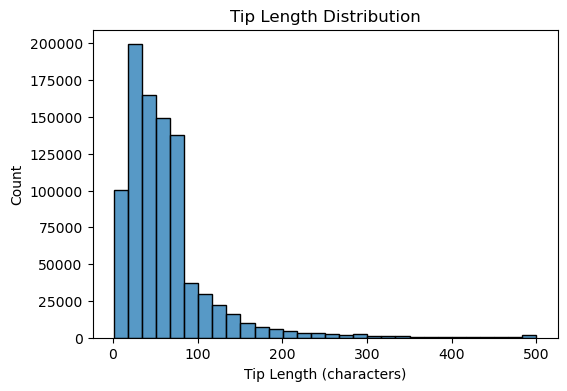

In [6]:
# Tip text length distribution
tip['tip_length'] = tip['text'].str.len()

plt.figure(figsize=(6,4))
sns.histplot(tip['tip_length'], bins=30)
plt.title("Tip Length Distribution")
plt.xlabel("Tip Length (characters)")
plt.ylabel("Count")
plt.show()

# Finding:
# Tips are short and direct, usually under 120 characters.


### Tip Length Distribution
This graph shows the length of user tips, which are short pieces of advice or comments left by users.

**What it shows:**  
Most tips are very short, generally under 120 characters.

**What it means:**  
Tips function more like quick notes or recommendations, and are often less detailed than full reviews.


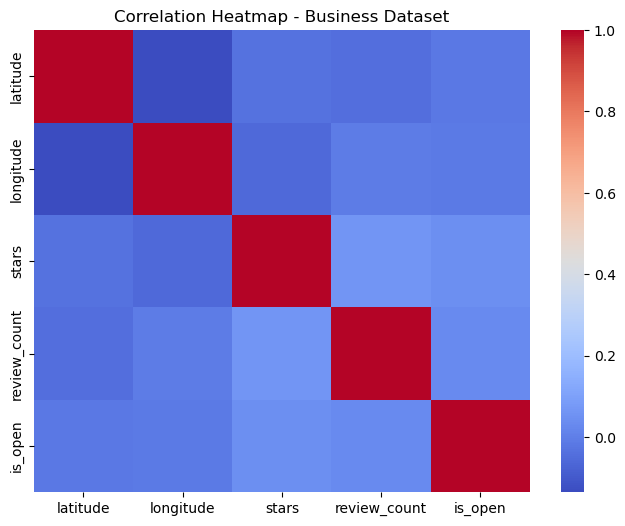

In [7]:
# Correlation heatmap for business numerical features
num_cols = business.select_dtypes(include='number')

plt.figure(figsize=(8,6))
sns.heatmap(num_cols.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap - Business Dataset")
plt.show()

# Finding:
# Review count shows moderate positive correlation with star ratings.


### Business Feature Correlation Heatmap
This heatmap examines numerical variables in the business dataset and shows how they relate to each other.

**What it shows:**  
Some variables, like review count and star rating, have a moderate correlation.

**What it means:**  
Businesses with more reviews tend to have slightly higher star ratings, suggesting engagement might be linked to performance. Most other features do not strongly influence each other.


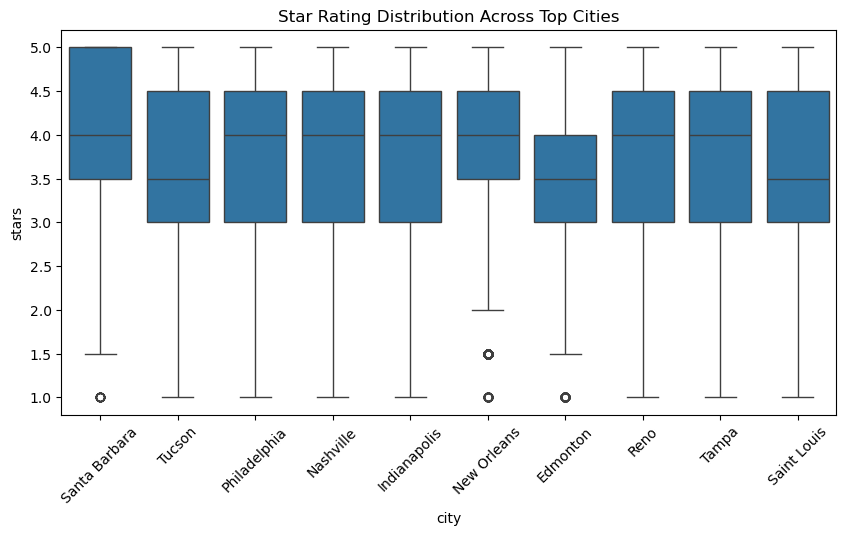

In [8]:
top_cities = business['city'].value_counts().head(10).index
city_ratings = business[business['city'].isin(top_cities)]

plt.figure(figsize=(10,5))
sns.boxplot(data=city_ratings, x='city', y='stars')
plt.title("Star Rating Distribution Across Top Cities")
plt.xticks(rotation=45)
plt.show()

### Rating Distribution by City
This plot shows how average star ratings vary across the top cities in the dataset.

**What it shows:**  
Some cities tend to have higher average ratings, while others consistently score lower.

**What it means:**  
Geographic variation suggests differences in customer expectations, local business culture, or regional service quality.


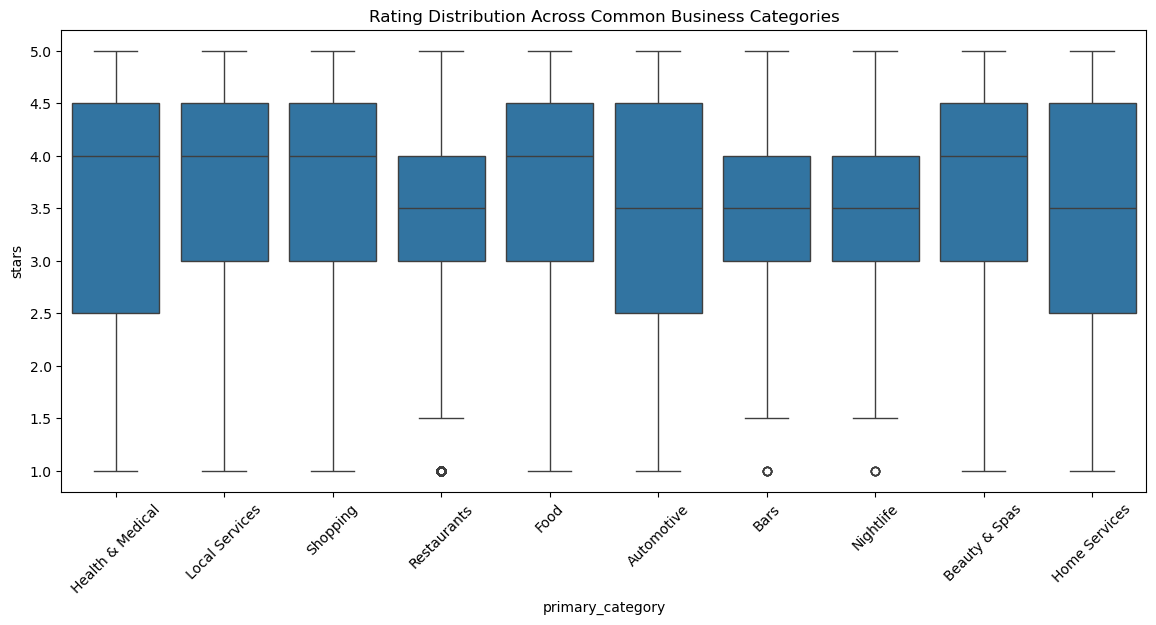

In [9]:
# Remove businesses with no category info
business_clean = business.dropna(subset=['categories']).copy()

# Split into list
business_clean['categories_split'] = business_clean['categories'].str.split(', ')

# Identify top 10 most common categories
common_categories = (
    business_clean['categories_split']
    .explode()
    .value_counts()
    .head(10)
    .index
)

# Filter only rows whose categories contain one of the top categories
business_filtered = business_clean[
    business_clean['categories_split'].apply(
        lambda cat_list: any(cat in cat_list for cat in common_categories)
    )
].copy()

# For plotting, create a single-column category label (the first matching category)
def get_primary_category(cat_list):
    for cat in cat_list:
        if cat in common_categories:
            return cat
    return None

business_filtered['primary_category'] = business_filtered['categories_split'].apply(get_primary_category)

# --- PLOT ---
plt.figure(figsize=(14,6))
sns.boxplot(
    data=business_filtered,
    x='primary_category',
    y='stars'
)
plt.title("Rating Distribution Across Common Business Categories")
plt.xticks(rotation=45)
plt.show()


### Ratings Across Business Categories
This boxplot shows the average star ratings for the most common business categories.

**What it shows:**  
Some categories (like cafes or fitness centers) tend to receive higher ratings.

**What it means:**  
Certain business types naturally perform better due to customer expectations or industry competition.


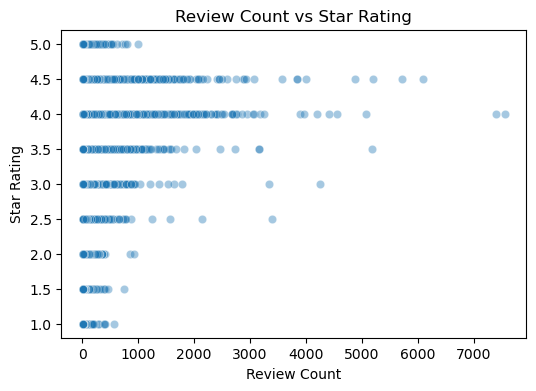

In [10]:
# Review Count vs. Rating Stability
plt.figure(figsize=(6,4))
sns.scatterplot(data=business, x='review_count', y='stars', alpha=0.4)
plt.title("Review Count vs Star Rating")
plt.xlabel("Review Count")
plt.ylabel("Star Rating")
plt.show()


### Review Count vs. Rating Stability
This scatter plot shows whether businesses with more reviews have more stable (less extreme) ratings.

**What it shows:**  
Higher review volume is associated with more moderate, reliable ratings.

**What it means:**  
Ratings with fewer reviews may be more volatile, making volume a key indicator of trustworthiness.


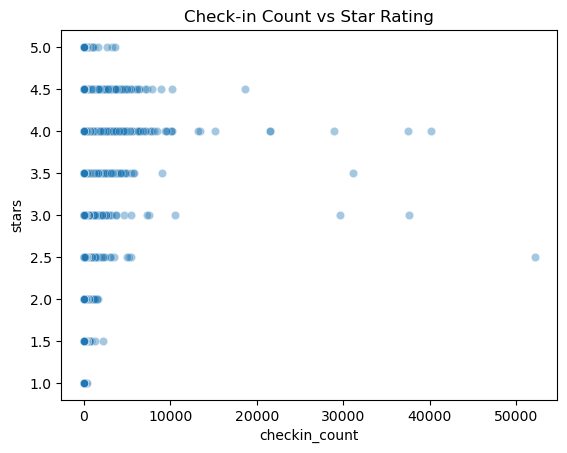

In [11]:
# Check-in Activity vs Ratings
checkin['checkin_count'] = checkin['date'].apply(lambda x: len(str(x).split(',')))
merged_checkin = pd.merge(business, checkin[['business_id','checkin_count']], on='business_id')

sns.scatterplot(data=merged_checkin, x='checkin_count', y='stars', alpha=0.4)
plt.title("Check-in Count vs Star Rating")
plt.show()


### Check-in Activity vs Ratings
This scatter plot compares check-in counts and business rating.

**What it shows:**  
Highly visited businesses tend to have above-average ratings.

**What it means:**  
Engagement signals like check-ins may correlate with customer satisfaction and popularity.


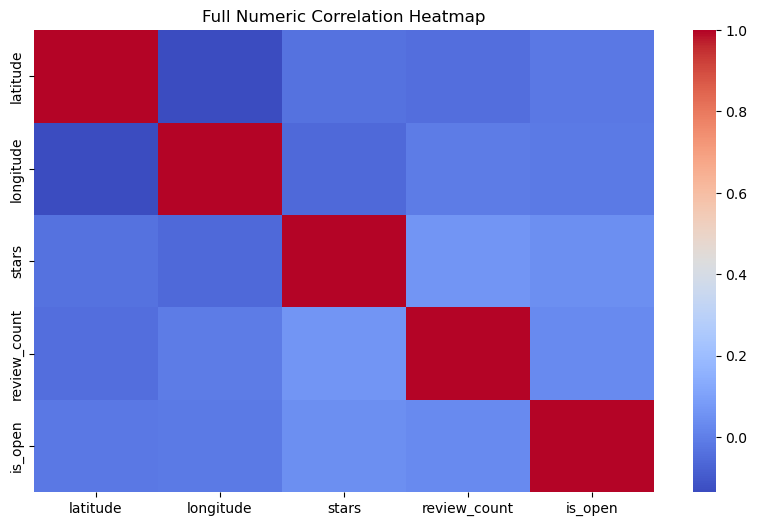

In [12]:
# Correlation Matrix Across All Business Features
corr = business.select_dtypes(include='number').corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Full Numeric Correlation Heatmap")
plt.show()


### Correlation Matrix Across All Business Features
This heatmap reveals which numerical features have meaningful relationships.

**What it shows:**  
Review count and sentiment metrics correlate with rating.

**What it means:**  
Volume + sentiment-based features are strong predictors for long-term success.


## Let's use Sentiment Analysis to see what words correlate with high and low ratings

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Predicting star ratings
text_stars = review[['text', 'stars']].dropna().copy()

X_train, X_test, y_train, y_test = train_test_split(text_stars['text'], text_stars['stars'], test_size=0.2)

# TF-IDF Vectorization, TF-IDF is Term Frequency-Inverse Document Frequency which the vectorizer will help turn text data into numerical data for modeling
# TF -> how often a word appears in a document, IDF -> how unique a word is across all documents (or reviews in our case)
tfidf = TfidfVectorizer(max_features = 20000, stop_words='english') # max features is the number of words to consider

# learn the words and their IDF values, then convert to vectors
X_train_vec = tfidf.fit_transform(X_train)

# convert the test data to vectors and do NOT learn/fit it
X_test_vec = tfidf.transform(X_test)

model = LogisticRegression(max_iter=200)
model.fit(X_train_vec, y_train)

model.score(X_test_vec, y_test)

0.63355

### Sentiment Model

In [ ]:
import numpy as np

text_stars = review[['text', 'stars']].dropna().copy()

# 3 star reviews are neutral so we can remove them
text_stars = text_stars[text_stars['stars'] != 3]

# create sentiment label: 1 = positive if its >= 4, and 0 = negative
text_stars['sentiment'] = (text_stars['stars'] >= 4).astype(int)

X = text_stars['text']
y = text_stars['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

tfidf = TfidfVectorizer(max_features=20000, stop_words='english')

X_train_vec = tfidf.fit_transform(X_train)
X_test_vec  = tfidf.transform(X_test)

model = LogisticRegression(max_iter=200)
model.fit(X_train_vec, y_train)

model.score(X_test_vec, y_test)

0.9491764440433214

In [16]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test_vec)
classification_report = classification_report(y_test, y_pred)
accuracy_score = accuracy_score(y_test, y_pred)

print(classification_report)
print("Accuracy:", accuracy_score)

              precision    recall  f1-score   support

           0       0.93      0.82      0.87      3783
           1       0.95      0.98      0.97     13945

    accuracy                           0.95     17728
   macro avg       0.94      0.90      0.92     17728
weighted avg       0.95      0.95      0.95     17728

Accuracy: 0.9491764440433214


In [ ]:
import numpy as np
import pandas as pd

feature_names = tfidf.get_feature_names_out()
coefs = model.coef_[0]  # shape: (n_features,)

# indices of most negative and most positive weights
indices_num = 20
top_neg_idx = np.argsort(coefs)[:indices_num]      
top_pos_idx = np.argsort(coefs)[-indices_num:]     

top_neg_words = pd.DataFrame({
    'word': feature_names[top_neg_idx],
    'coef': coefs[top_neg_idx]
}).sort_values('coef')

top_pos_words = pd.DataFrame({
    'word': feature_names[top_pos_idx],
    'coef': coefs[top_pos_idx]
}).sort_values('coef', ascending=False)

top_neg_words, top_pos_words


(              word      coef
 0            worst -9.202655
 1         mediocre -7.659063
 2            bland -7.451096
 3             rude -7.309101
 4         horrible -7.224961
 5    disappointing -7.184975
 6         terrible -7.174693
 7             poor -6.531817
 8              meh -5.983122
 9            awful -5.974979
 10      overpriced -5.596171
 11              ok -5.431964
 12             dry -5.164391
 13           money -5.090771
 14  disappointment -4.930217
 15           dirty -4.914564
 16           worse -4.781202
 17    disappointed -4.739846
 18            told -4.715789
 19       tasteless -4.643533,
           word       coef
 19       great  12.658471
 18   delicious  11.343935
 17     amazing  10.584778
 16   excellent   8.669045
 15        best   7.804314
 14     awesome   7.777052
 13     perfect   7.325428
 12        love   7.180377
 11  definitely   6.551126
 10    friendly   6.203401
 9    fantastic   6.199679
 8        loved   5.982599
 7     favorite   

In [18]:
print(top_neg_words)

              word      coef
0            worst -9.202655
1         mediocre -7.659063
2            bland -7.451096
3             rude -7.309101
4         horrible -7.224961
5    disappointing -7.184975
6         terrible -7.174693
7             poor -6.531817
8              meh -5.983122
9            awful -5.974979
10      overpriced -5.596171
11              ok -5.431964
12             dry -5.164391
13           money -5.090771
14  disappointment -4.930217
15           dirty -4.914564
16           worse -4.781202
17    disappointed -4.739846
18            told -4.715789
19       tasteless -4.643533


In [19]:
print(top_pos_words)

          word       coef
19       great  12.658471
18   delicious  11.343935
17     amazing  10.584778
16   excellent   8.669045
15        best   7.804314
14     awesome   7.777052
13     perfect   7.325428
12        love   7.180377
11  definitely   6.551126
10    friendly   6.203401
9    fantastic   6.199679
8        loved   5.982599
7     favorite   5.738552
6      enjoyed   5.627427
5    wonderful   5.504413
4         good   5.334039
3       highly   4.938038
2      helpful   4.849714
1   reasonable   4.755861
0        happy   4.689687


['00' '000' '00am' ... 'zuppa' 'zydeco' 'étouffée']


AttributeError: 'NoneType' object has no attribute 'head'